# 순환 신경망으로 IMDB 리뷰 분류하기

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
conda install tensorflow


Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


## IMDB 리뷰 데이터셋

In [18]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

ModuleNotFoundError: No module named 'tensorflow'

In [19]:
print(train_input.shape, test_input.shape)

NameError: name 'train_input' is not defined

In [3]:
print(len(train_input[0]))

NameError: name 'train_input' is not defined

In [4]:
print(len(train_input[1]))

NameError: name 'train_input' is not defined

In [5]:
print(train_input[0])

NameError: name 'train_input' is not defined

In [6]:
print(train_target[:20])

NameError: name 'train_target' is not defined

In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

NameError: name 'train_input' is not defined

In [ ]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
print(train_seq.shape)

In [ ]:
print(train_seq[0])

In [8]:
print(train_input[0][-10:])

NameError: name 'train_input' is not defined

In [9]:
print(train_seq[5])

NameError: name 'train_seq' is not defined

In [10]:
val_seq = pad_sequences(val_input, maxlen=100)

NameError: name 'pad_sequences' is not defined

## 순환 신경망 만들기

In [11]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

ModuleNotFoundError: No module named 'tensorflow'

In [12]:
train_oh = keras.utils.to_categorical(train_seq)

NameError: name 'keras' is not defined

In [13]:
print(train_oh.shape)

NameError: name 'train_oh' is not defined

In [14]:
print(train_oh[0][0][:12])

NameError: name 'train_oh' is not defined

In [15]:
print(np.sum(train_oh[0][0]))

NameError: name 'np' is not defined

In [16]:
val_oh = keras.utils.to_categorical(val_seq)

NameError: name 'keras' is not defined

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6880 - accuracy: 0.5430 - val_loss: 0.6777 - val_accuracy: 0.5826
Epoch 2/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6646 - accuracy: 0.6126 - val_loss: 0.6615 - val_accuracy: 0.6178
Epoch 3/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6462 - accuracy: 0.6509 - val_loss: 0.6401 - val_accuracy: 0.6588
Epoch 4/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6284 - accuracy: 0.6797 - val_loss: 0.6243 - val_accuracy: 0.6822
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6112 - accuracy: 0.7015 - val_loss: 0.6087 - val_accuracy: 0.6982
Epoch 6/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5945 - accuracy: 0.7217 - val_loss: 0.5940 - val_accuracy: 0.7146
Epoch 7/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5794 - accuracy: 0.7347 - val_loss: 0.5798 - val_ac

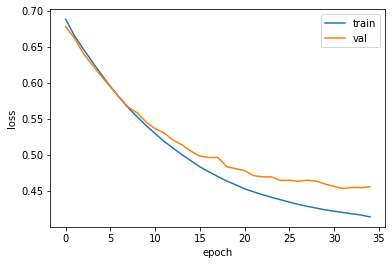

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 단어 임베딩을 사용하기

In [26]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6936 - accuracy: 0.5196 - val_loss: 0.6824 - val_accuracy: 0.5746
Epoch 2/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6725 - accuracy: 0.6146 - val_loss: 0.6611 - val_accuracy: 0.6450
Epoch 3/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6474 - accuracy: 0.6702 - val_loss: 0.6382 - val_accuracy: 0.6874
Epoch 4/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6219 - accuracy: 0.7061 - val_loss: 0.6141 - val_accuracy: 0.7086
Epoch 5/100
313/313 [==============================] - 19s 62ms/step - loss: 0.5948 - accuracy: 0.7304 - val_loss: 0.5910 - val_accuracy: 0.7276
Epoch 6/100
313/313 [==============================] - 19s 62ms/step - loss: 0.5703 - accuracy: 0.7476 - val_loss: 0.5713 - val_accuracy: 0.7412
Epoch 7/100
313/313 [==============================] - 19s 61ms/step - loss: 0.5482 - accuracy: 0.7622 - val_loss: 0.5546 - val_ac

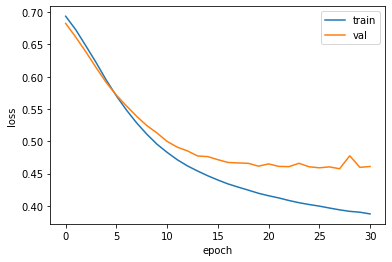

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()